In [183]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [165]:
class Node:
    value = None
    left, right = None, None

    def __init__(self, value, left, right):
        self.value = value
        self.left = left
        self.right = right
    
    def __str__(self):
        string = f"{self.value}"
        if self.left is not None and self.right is not None:
            string += f" -> ({self.left.__str__()}, {self.right.__str__()})"
        return string

In [166]:
def _build_tree(probability, height):
    left, right = None, None
    if height > 0:
        left = _build_tree(probability, height - 1)
        right = _build_tree(probability, height - 1)
    
    value = np.random.binomial(n=1, p=probability)

    return Node(value, left, right)

In [167]:
def build_tree(probability, height):
    tree = _build_tree(probability, height)
    tree.value = 1
    return tree

In [168]:
def can_aaron_win(tree, isEvenDepth):
    if tree is None:
        return True
    
    if tree.value == 0:
        return False
    
    canWinLeft = can_aaron_win(tree.left, not isEvenDepth)
    canWinRight = can_aaron_win(tree.right, not isEvenDepth)

    if isEvenDepth:
        return canWinLeft or canWinRight
    else:
        return canWinLeft and canWinRight

In [169]:
def build_and_evaluate_instance(probability, height):
    tree = build_tree(probability, height)
    return can_aaron_win(tree, isEvenDepth=True)

In [170]:
def sample(probability, height, samples):
    samples = [build_and_evaluate_instance(probability, height) for _ in range(samples)]
    probability_aaron_wins = np.average(samples)
    return probability_aaron_wins

In [203]:
samples = 30
height = 20

probabilities = [1 - (2 ** - i) for i in range(4, 8)]
expected_time = samples * (2 ** height) * len(probabilities) / 320992
print(f"Expected time it will take to complete {expected_time:.2f}s")
sample_aaron_successes = [sample(probability, height, samples) for probability in probabilities]

Expected time it will take to complete 392.00s


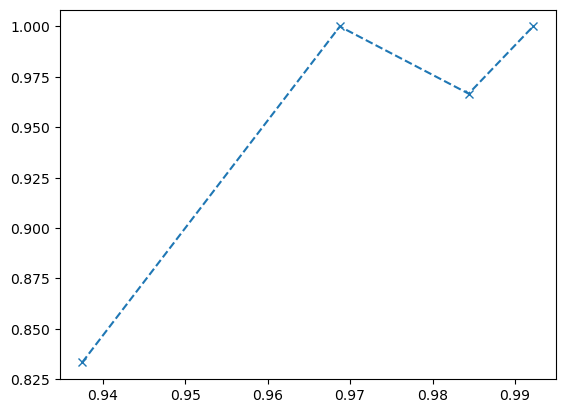

In [204]:
plt.plot(probabilities, sample_aaron_successes, marker="x", linestyle='--')

plt.show()